#### About the Data and my Expected Analysis

I have chosen to work on a dataset that contains City Payroll Information for all Los Angeles city departments. These departments are the ones that work for the city and do not involve any private organizations. The dataset includes a variety of variables, such as job titles, salaries, bonuses, and benefit costs. In this project, I am particularly intrigued by the predictive power of various factors on the Benefit Costs and Basic Life insurance coverage of employees that work for LA. Through regression analysis, I hope to uncover insights into the relationships between different attributes and the resulting dependent variable and also explore whether certain components that significantly influence it, providing valuable information for understanding the compensation structure within the city.

#### Importing Libraries

In [1]:
library(dplyr)
library(ggplot2)
library(caTools)
library(GGally)
library(MASS)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




#### Data Loading

In [2]:
# Loading the CSV file

data = read.csv("data.csv")
head(data)

,Row.ID,Year,Department.Title,Payroll.Department,Record.Number,Job.Class.Title,Employment.Type,Hourly.or.Event.Rate,Projected.Annual.Salary,Q1.Payments,⋯,MOU.Title,FMS.Department,Job.Class,Pay.Grade,Average.Health.Cost,Average.Dental.Cost,Average.Basic.Life,Average.Benefit.Cost,Benefits.Plan,Job.Class.Link
,<int>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,111391,2014,Water And Power (DWP),NA,1412316577,Commercial Service Representative,Full Time,,$70386.48,$16129.89,⋯,,98,1230,,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
2,31732,2013,Police (LAPD),4301,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,⋯,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,27697,2013,Police (LAPD),4301,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,⋯,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
4,14136,2013,Harbor (Port of LA),3201,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,⋯,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
5,91896,2014,Public Works - Sanitation,7024,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,⋯,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf
6,106560,2014,Water And Power (DWP),NA,681385707,Security Officer,Full Time,,$65959.92,$26530.26,⋯,,98,3181,,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/3181.pdf


In [3]:
# Getting the names of all the attributes in the data

names(data)

[1] "Row.ID"                       "Year"                        
 [3] "Department.Title"             "Payroll.Department"          
 [5] "Record.Number"                "Job.Class.Title"             
 [7] "Employment.Type"              "Hourly.or.Event.Rate"        
 [9] "Projected.Annual.Salary"      "Q1.Payments"                 
[11] "Q2.Payments"                  "Q3.Payments"                 
[13] "Q4.Payments"                  "Payments.Over.Base.Pay"      
[15] "X..Over.Base.Pay"             "Total.Payments"              
[17] "Base.Pay"                     "Permanent.Bonus.Pay"         
[19] "Longevity.Bonus.Pay"          "Temporary.Bonus.Pay"         
[21] "Lump.Sum.Pay"                 "Overtime.Pay"                
[23] "Other.Pay...Adjustments"      "Other.Pay..Payroll.Explorer."
[25] "MOU"                          "MOU.Title"                   
[27] "FMS.Department"               "Job.Class"                   
[29] "Pay.Grade"                    "Average.Health.Cost"         
[31] "Average.Dental.Cost"          "Average.Basic.Life"          
[33] "Average.Benefit.Cost"         "Benefits.Plan"               
[35] "Job.Class.Link"

#### Data Carpentry

In [4]:
# Removing unwanted columns

rem <- c('Row.ID','Payroll.Department','Record.Number','X..Over.Base.Pay','Other.Pay...Adjustments','Lump.Sum.Pay','MOU','MOU.Title','FMS.Department','Job.Class','Pay.Grade','Job.Class.Link')

data <- data[!(names(data) %in% rem)]
names(data)

[1] "Year"                         "Department.Title"            
 [3] "Job.Class.Title"              "Employment.Type"             
 [5] "Hourly.or.Event.Rate"         "Projected.Annual.Salary"     
 [7] "Q1.Payments"                  "Q2.Payments"                 
 [9] "Q3.Payments"                  "Q4.Payments"                 
[11] "Payments.Over.Base.Pay"       "Total.Payments"              
[13] "Base.Pay"                     "Permanent.Bonus.Pay"         
[15] "Longevity.Bonus.Pay"          "Temporary.Bonus.Pay"         
[17] "Overtime.Pay"                 "Other.Pay..Payroll.Explorer."
[19] "Average.Health.Cost"          "Average.Dental.Cost"         
[21] "Average.Basic.Life"           "Average.Benefit.Cost"        
[23] "Benefits.Plan"

In [5]:
# Changing blanks to NA (will be easier to handle missing values)

for (col in names(data)) {
  data[[col]][data[[col]] == ""] <- NA
}

In [6]:
# Removing $ signs from the columns and changing data type to 'numeric' from 'chr' for specific attributes.

exclude <- c('Department.Title','Job.Class.Title','Employment.Type','Benefits.Plan')

for (col in names(data)) {
    if (!(col %in% exclude)) {
        data[[col]] <- as.numeric(gsub("[$]", "", data[[col]]))
        }
}

In [7]:
# Converting Benefits.Plan to factor for later analysis.

data$Benefits.Plan = as.factor(data$Benefits.Plan)

In [8]:
str(data)

'data.frame':	285008 obs. of  23 variables:
 $ Year                        : num  2014 2013 2013 2013 2014 ...
 $ Department.Title            : chr  "Water And Power (DWP)" "Police (LAPD)" "Police (LAPD)" "Harbor (Port of LA)" ...
 $ Job.Class.Title             : chr  "Commercial Service Representative" "Police Officer I" "Police Officer II" "Senior Security Officer" ...
 $ Employment.Type             : chr  "Full Time" "Full Time" "Full Time" "Full Time" ...
 $ Hourly.or.Event.Rate        : num  NA 25.1 42.8 28.8 30.9 ...
 $ Projected.Annual.Salary     : num  70386 52451 89304 60029 64553 ...
 $ Q1.Payments                 : num  16130 11331 20036 15794 14700 ...
 $ Q2.Payments                 : num  17830 13860 23479 18560 17313 ...
 $ Q3.Payments                 : num  17678 11968 21154 16471 15257 ...
 $ Q4.Payments                 : num  22947 14048 24360 21111 17313 ...
 $ Payments.Over.Base.Pay      : num  14274 1700 4120 14275 5192 ...
 $ Total.Payments              : num  7458

In [9]:
# No of NA values in this attribute.

sum(is.na(data$Benefits.Plan))

[1] 39082

Since my analysis is based on the Average Basic Life and Benefit plans, I will be filtering the data to only full time employment. There are no benefit plans for Part time and Per Event employees. So I will not include them in this study.

In [10]:
data = subset(data, data$Employment.Type == 'Full Time')
head(data)

,Year,Department.Title,Job.Class.Title,Employment.Type,Hourly.or.Event.Rate,Projected.Annual.Salary,Q1.Payments,Q2.Payments,Q3.Payments,Q4.Payments,⋯,Permanent.Bonus.Pay,Longevity.Bonus.Pay,Temporary.Bonus.Pay,Overtime.Pay,Other.Pay..Payroll.Explorer.,Average.Health.Cost,Average.Dental.Cost,Average.Basic.Life,Average.Benefit.Cost,Benefits.Plan
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2014,Water And Power (DWP),Commercial Service Representative,Full Time,NA,70386.48,16129.89,17829.78,17678.24,22946.57,⋯,0.00,0.00,0.0,369.12,13904.79,16842.08,1282.61,0.00,18124.69,DWP
2,2013,Police (LAPD),Police Officer I,Full Time,25.12,52450.56,11331.00,13859.93,11968.32,14048.20,⋯,1269.83,0.00,239.2,11.13,1689.27,11651.40,898.08,191.04,12740.52,Police
3,2013,Police (LAPD),Police Officer II,Full Time,42.77,89303.76,20036.32,23479.20,21153.60,24360.49,⋯,1954.51,0.00,1519.0,482.29,3637.91,11651.40,898.08,191.04,12740.52,Police
4,2013,Harbor (Port of LA),Senior Security Officer,Full Time,28.75,60028.96,15793.88,18560.38,16471.18,21110.80,⋯,0.00,1585.72,935.0,11504.72,2770.72,10710.24,405.24,11.40,11126.88,City
5,2014,Public Works - Sanitation,Senior Clerk Typist,Full Time,30.92,64553.13,14700.00,17313.10,15257.17,17313.10,⋯,0.00,4774.25,0.0,417.37,4774.25,11000.40,409.68,11.40,11421.48,City
6,2014,Water And Power (DWP),Security Officer,Full Time,NA,65959.92,26530.26,32978.41,25697.50,39779.96,⋯,0.00,0.00,0.0,37871.42,50069.63,16842.08,1282.61,0.00,18124.69,DWP


In [11]:
# Row count of dataset
nrow(data)

[1] 236553

In [12]:
# Columns with missing values
names(which(colSums(is.na(data)) > 0))

[1] "Hourly.or.Event.Rate"

#### Exploring Categorical Variables

In [13]:
# Distribution of counts of Benefits plans.

table(data$Benefits.Plan)


  City    DWP   Fire Police 
116000  52923  16561  51069 

While exploring the data, I had noticed that not all LAPD (police) employees get 'Police' Benefit plans. 

In [14]:
# Filtering out only Police Department data

bolice = subset(data, Department.Title == 'Police (LAPD)')
bolice$Benefits.Plan = as.factor(bolice$Benefits.Plan)


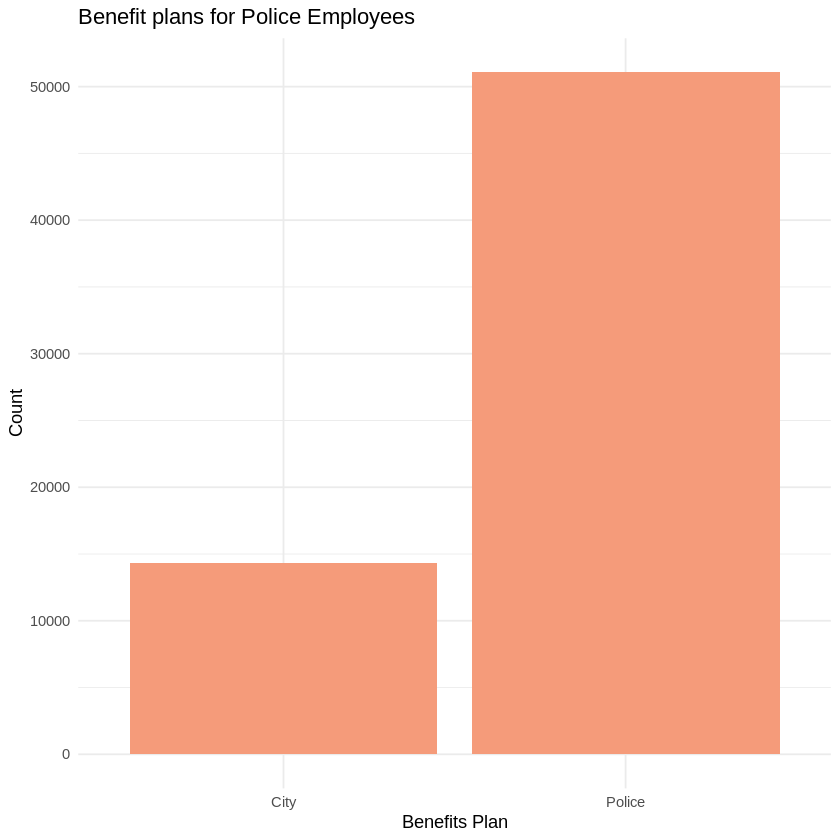

In [15]:
# Benefit plans for Police Employees.

ggplot(bolice, aes(x=Benefits.Plan)) + geom_bar(fill = "#f59b7a") +
labs(title = "Benefit plans for Police Employees",
       x = "Benefits Plan",
       y = "Count") + theme_minimal()

#### K means Clustering

I will be performing K means clustering with attributes like Base Pay and Benefits cost. Let's see if there are any clusters that will be formed or not.

In [16]:
# Subsetting data for K means
kdata = subset(data, select = c(13,22))
head(kdata)

,Base.Pay,Average.Benefit.Cost
,<dbl>,<dbl>
1,60310.57,18124.69
2,49507.05,12740.52
3,84909.41,12740.52
4,57660.80,11126.88
5,59391.75,11421.48
6,37045.08,18124.69


In [17]:
# Standardizing the variables
kdata = as.data.frame(scale(kdata))

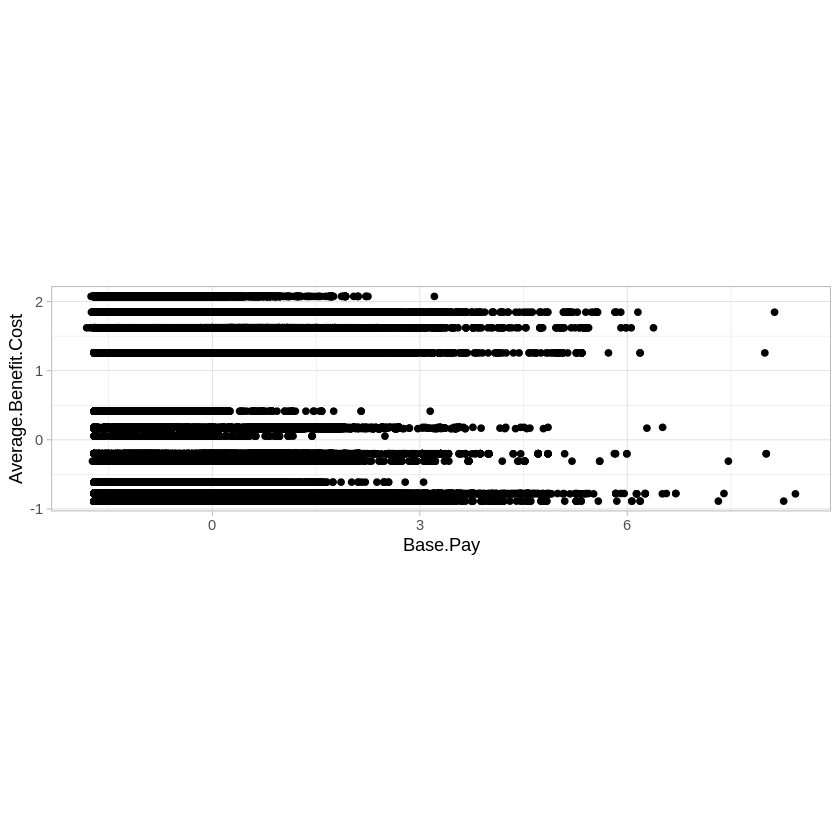

In [18]:
ggplot(kdata, aes(Base.Pay, Average.Benefit.Cost)) + 
    geom_point(color="black") + coord_equal() + theme_light()


Since I know that there are 4 Benefit Plans, I will be using 4 clusters in the following code.

In [ ]:

set.seed(42)
kmeans_clust <- kmeans(kdata, 4, nstart = 20)
kmeans_clust

In [20]:
table(kmeans_clust$cluster, data$Benefits.Plan)

   
     City   DWP  Fire Police
  1     0 28941     0      0
  2 40122     0  9382  27721
  3 75878     0  7179  23348
  4     0 23982     0      0

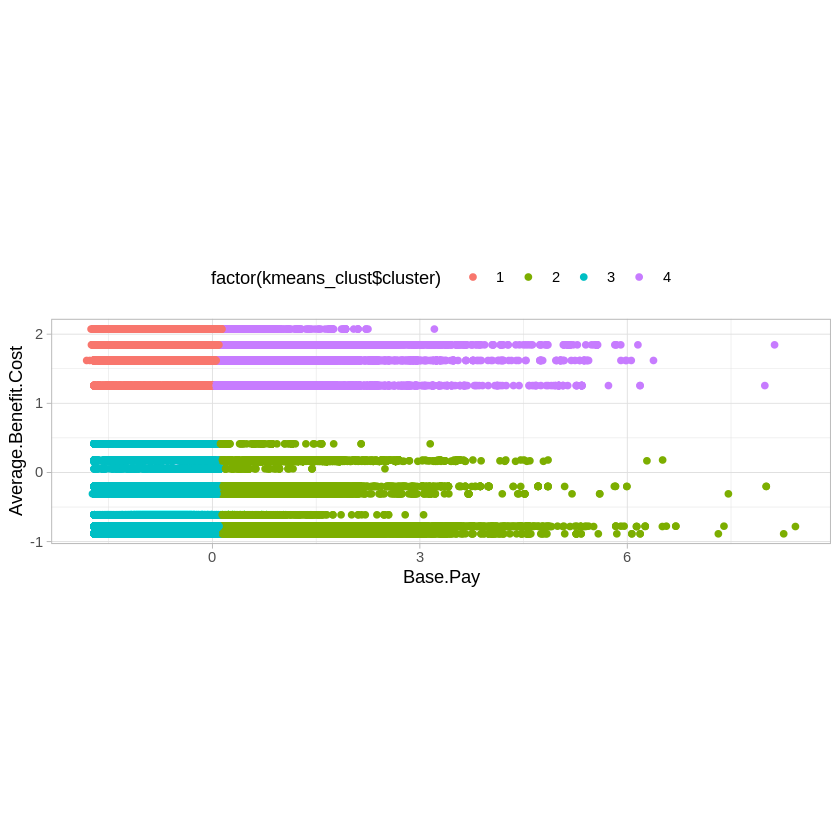

In [21]:
ggplot(kdata, aes(Base.Pay, Average.Benefit.Cost))  + geom_point(aes(color = factor(kmeans_clust$cluster))) + 
           coord_equal() + theme_light() + theme(legend.position="top")

Looking at the results above, I can notice some difference between the groups. It is also interesting to note that it was able to catch the fact that not all LAPD (police) employees get 'Police' Benefit plans. Some even get 'city' plans. Similar thing with the Fire Department employees.

#### Hypothesis testing - One-way ANOVA
##### Do employment benefits vary significantly between Benefit Plans?

In [22]:
# Average Benefit costs breakdown for each Benefit plan

mean_table <- data %>%
  group_by(Benefits.Plan) %>%
  summarize(
    Average_Health_Cost = mean(Average.Health.Cost),
    Average_Dental_Cost = mean(Average.Dental.Cost),
    Average_Basic_Life = mean(Average.Basic.Life),
    Average_Benefit_Cost = mean(Average.Benefit.Cost)
  )
mean_table

Benefits.Plan,Average_Health_Cost,Average_Dental_Cost,Average_Basic_Life,Average_Benefit_Cost
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
City,11040.88,409.9921,11.4100,11462.28
DWP,17179.10,1263.8181,0.0000,18442.92
Fire,12942.13,900.6339,175.1172,14017.88
Police,12237.95,889.9878,191.2180,13319.16


Average Benefit Cost is the sum of Average_Health_Cost, Average_Dental_Cost & Average_Basic_Life.

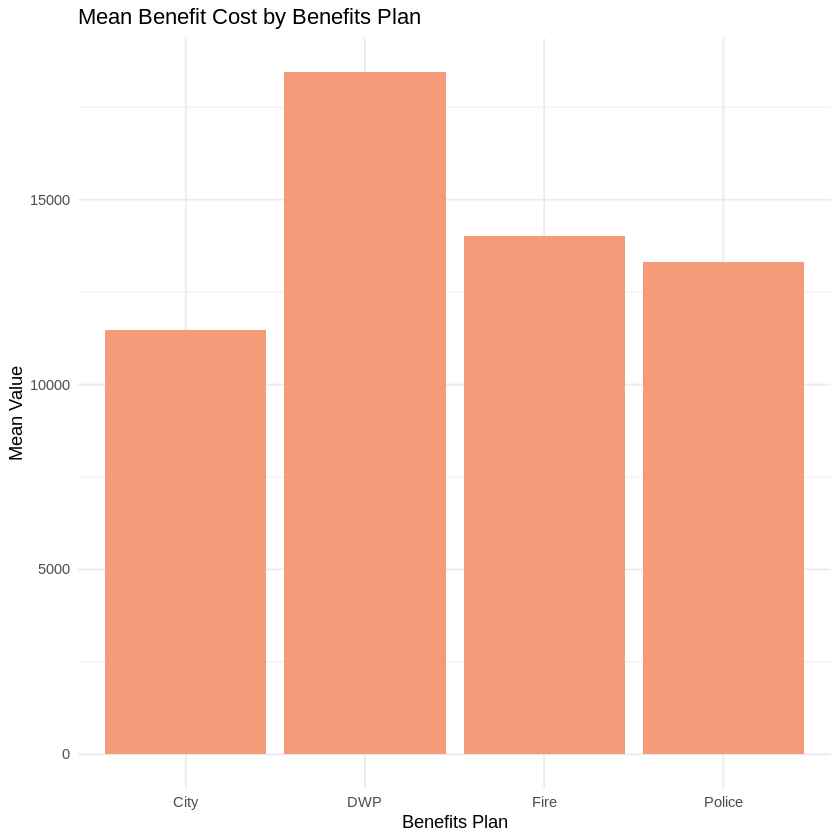

In [23]:
# Bar plot of Average Benefit Cost per Benefit plan

ggplot(mean_table, aes(x = Benefits.Plan)) +
  geom_bar(aes(y = Average_Benefit_Cost), stat = "identity",fill = "#f59b7a") +
  labs(title = "Mean Benefit Cost by Benefits Plan",
       x = "Benefits Plan",
       y = "Mean Value") + theme_minimal()

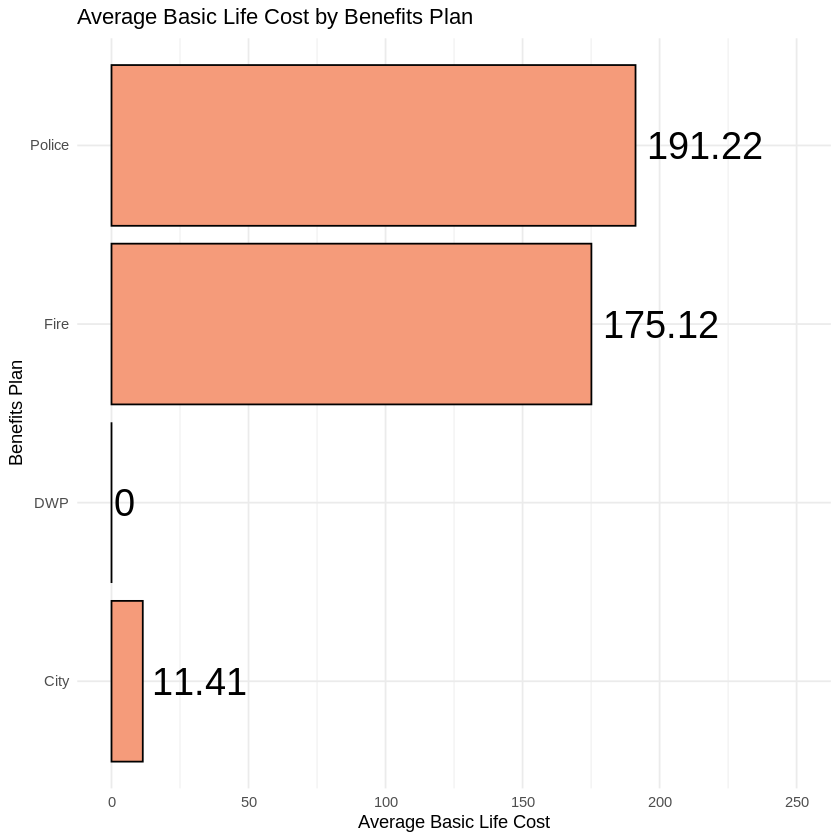

In [24]:
# Bar plot of Basic Life Cost per Benefit plan

ggplot(mean_table, aes(x = Average_Basic_Life, y = Benefits.Plan, fill = Benefits.Plan)) +
  geom_bar(stat = "identity", fill = '#f59b7a',color = "Black",show.legend = FALSE) +
  geom_text(aes(label = round(Average_Basic_Life, 2)), hjust = -0.1, vjust = 0.5, color = "black", size = 8) +
  labs(title = "Average Basic Life Cost by Benefits Plan",
       x = "Average Basic Life Cost",
       y = "Benefits Plan") +
  theme_minimal() + xlim(0, 250)

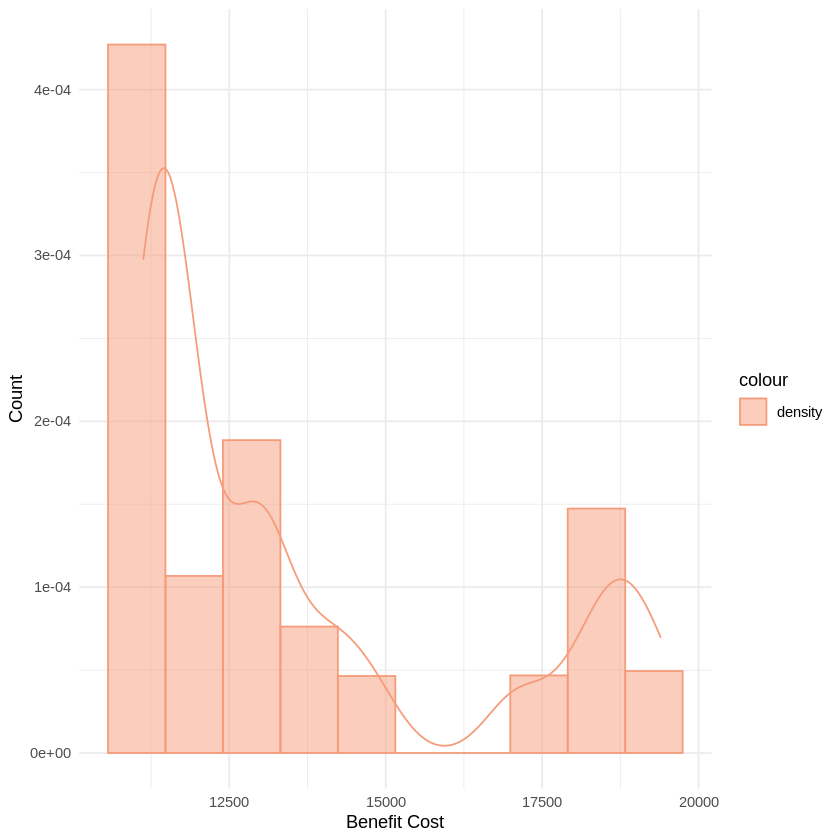

In [25]:
# Distribution of total Benefit Costs

ggplot(data,aes(x = Average.Benefit.Cost, color = 'density')) +  
  geom_histogram(aes(y = ..density..), bins = 10,  fill = '#f59b7a', alpha = 0.5) +  
  geom_density(bw = 500, color = '#f59b7a') +   
  ylab("Count") + 
  xlab("Benefit Cost")  + theme(legend.title=element_blank()) + theme_minimal()+
  scale_color_manual(values = c('density' = '#f59b7a'))

The distribution doesn't exactly look like its normally distributed.

Since this dataset has around 200,000 rows, I was thinking if I could assume normality?.
I feel I can rely on the central limit theorem, which states that the distribution of the sample mean approaches a normal distribution as the sample size increases, regardless of the shape of the original distribution.

Below I am trying to use the concept of Central Limit Theorem. 

In [26]:
# Drawing 500 samples each with 50 observations.

sample_size <- 50
num_samples <- 500
 
samples <- replicate(num_samples, sample(data$Average.Benefit.Cost, size = sample_size,replace = TRUE))

In [27]:
# Calculation Sample Mean and Variance

sample_means <- colMeans(samples)
x_bar <- mean(sample_means)
std <- sd(sample_means)
 
print('Sample Mean and Variance')
print(x_bar)
print(std**2)

[1] "Sample Mean and Variance"
[1] 13599.18
[1] 164060.4


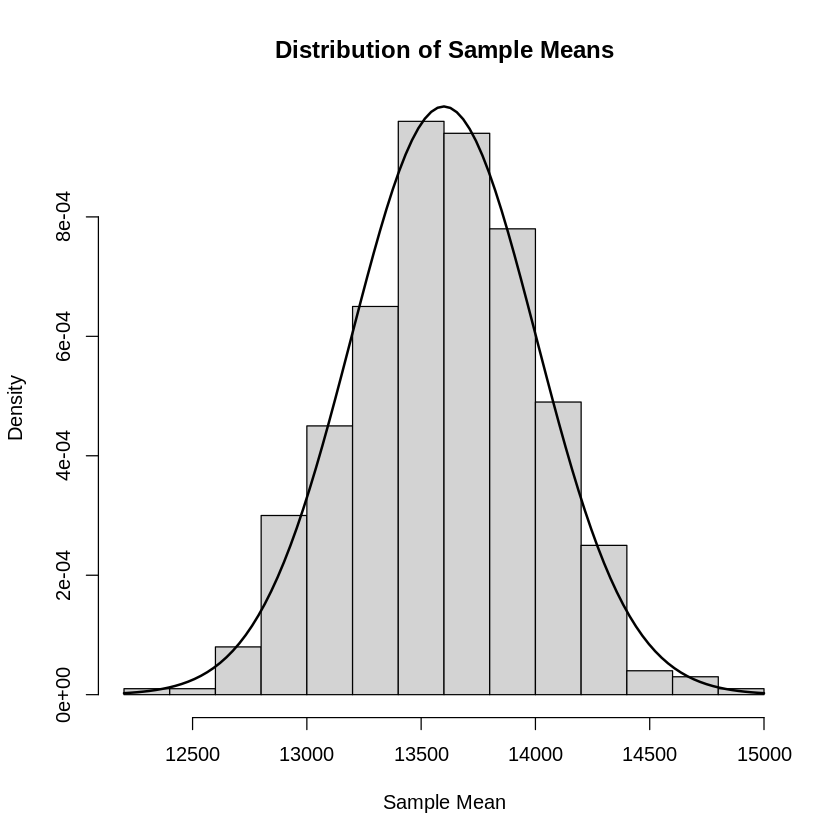

In [28]:
# Visualizing the sample means

hist(sample_means, breaks = 15, prob = TRUE, main = "Distribution of Sample Means", xlab = "Sample Mean")
 
# Distribution Curve
curve(dnorm(x, mean = x_bar, sd = std), col = "Black", lwd = 2, add = TRUE)

As you can see, the sample means distribution follows a normal curve. Thus we can say that Central limit theorem is satisfied and we can assume normality.

**H0:** No significant difference in the mean "Average.Benefit.Cost" among the different levels of the "Benefits.Plan" variable.

**H1:** There is a significant difference in the mean "Average.Benefit.Cost" among at least one pair of "Benefits.Plan" levels.

In [29]:
# One way Anova Test
aov1 <- aov(Average.Benefit.Cost ~ Benefits.Plan, data = data)
summary(aov1)

                  Df    Sum Sq   Mean Sq F value Pr(>F)    
Benefits.Plan      3 1.778e+12 5.928e+11 2158868 <2e-16 ***
Residuals     236549 6.495e+10 2.746e+05                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [30]:
# Tukey significance test
TukeyHSD(aov1)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Average.Benefit.Cost ~ Benefits.Plan, data = data)

$Benefits.Plan
                 diff        lwr        upr p adj
DWP-City     6980.641  6973.5801  6987.7028     0
Fire-City    2555.597  2544.4150  2566.7796     0
Police-City  1856.879  1849.7304  1864.0281     0
Fire-DWP    -4425.044 -4437.0300 -4413.0582     0
Police-DWP  -5123.762 -5132.1123 -5115.4120     0
Police-Fire  -698.718  -710.7557  -686.6803     0


 From the above results we see that the p value is 0 (or very close to zero) and therefore can safely reject null hypothesis.
 This indicates that the differences in means between each Benefit plan are statistically significant.

#### Hypothesis testing - T test (two sample test)
##### Is there a significant difference in the total employee benefits cost between the two most employed departments?

In [31]:
# Descending Count of Employees of each Department working for the City of LA

data %>%
    group_by(Department.Title) %>%
    summarize(count = n()) %>%
    arrange(desc(count))

Department.Title,count
<chr>,<int>
Police (LAPD),65429
Water And Power (DWP),52923
Fire (LAFD),18107
Airports (LAWA),16944
Public Works - Sanitation,12710
General Services,7029
Recreation And Parks,7009
Transportation (LADOT),6734
Harbor (Port of LA),4741


Police(LAPD) and Water And Power(DWP) are the departments with most employees compared to the rest.

In [32]:
# Subset data for POLICE and DWP employees.

hypsub = subset(data, Department.Title %in% c("Police (LAPD)", "Water And Power (DWP)"))

In [33]:
# Here I had to sample 5000 observations from my data because I will be doing a shapiro-wilk normality test. 
# This test only works with a maximum of 5000 samples.

set.seed(123)
hypsub1 <- hypsub[sample(nrow(hypsub), 5000), ]

In [34]:
nrow(hypsub1)

[1] 5000

In [35]:
# Shapiro wilk test to test for normality

shapiro.test(hypsub1$Average.Benefit.Cost[hypsub1$Department.Title == "Police (LAPD)"])
shapiro.test(hypsub1$Average.Benefit.Cost[hypsub1$Department.Title == "Water And Power (DWP)"])


	Shapiro-Wilk normality test

data:  hypsub1$Average.Benefit.Cost[hypsub1$Department.Title == "Police (LAPD)"]
W = 0.83386, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  hypsub1$Average.Benefit.Cost[hypsub1$Department.Title == "Water And Power (DWP)"]
W = 0.84181, p-value < 2.2e-16


Since the W value is closer to 1 in both cases, the samples resemble a normal distribution.

In [36]:
# Equal Variance test
x = hypsub1$Average.Benefit.Cost[hypsub1$Department.Title == "Police (LAPD)"]
y = hypsub1$Average.Benefit.Cost[hypsub1$Department.Title == "Water And Power (DWP)"]
var.test(x,y)


	F test to compare two variances

data:  x and y
F = 1.7639, num df = 2808, denom df = 2190, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.629487 1.908550
sample estimates:
ratio of variances 
          1.763852 


In this case, with a very low p value, we have to reject null hypothesis. This means that the variances of the two groups are significantly different (unequal variances).

So now that the assumptions have been analyzed. We have to use a Welch's t-test which is a modification of the standard t-test that does not assume equal variances between the groups.

**H0:** No significant difference in the mean total benefits cost between the two departments.

**H1:** There is a significant difference in the mean total benefits cost between the two departments.

In [37]:
# Two sample Welch's T-test

t.test(x, y, alternative="two.sided", mu=0, var.equal=F, conf.level=0.95)


	Welch Two Sample t-test

data:  x and y
t = -221.89, df = 4992, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5566.204 -5468.707
sample estimates:
mean of x mean of y 
 12922.00  18439.45 


With the p value being very low, we reject the null hypothesis. This means that there is a significant difference in the mean total benefits cost between the two departments.

#### More analysis on Benefit plans and Years

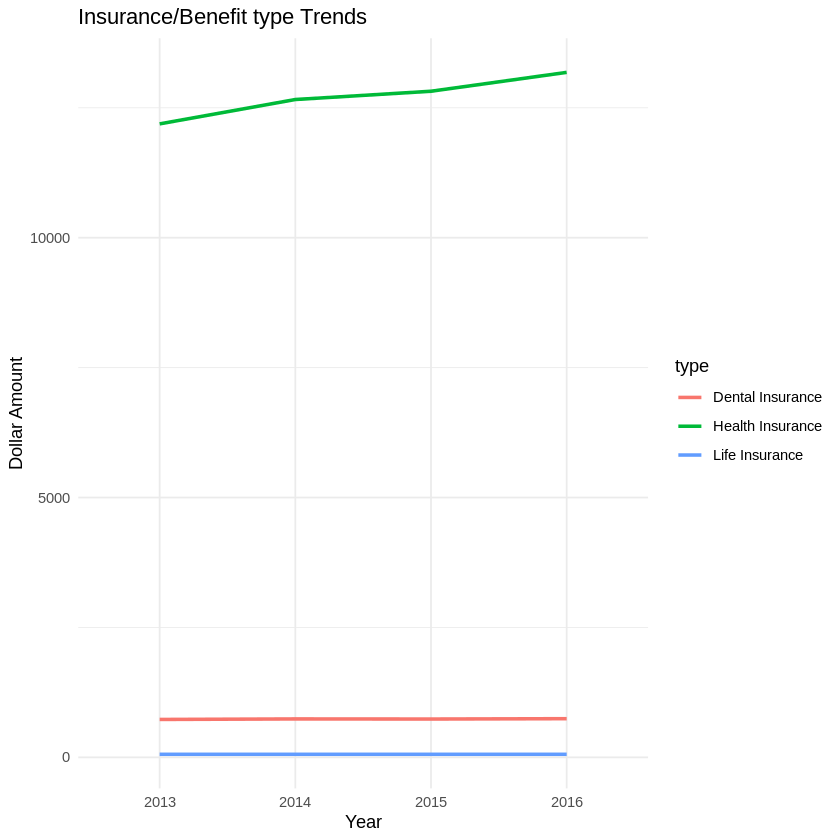

In [38]:
# Let's look at the changing cost of benefits(Health, life & Dental) in each year (2013 - 2016).

data$Year <- as.factor(data$Year)

life  <- aggregate(data$Average.Basic.Life, list(data$Year), mean)
dentist <- aggregate(data$Average.Dental.Cost, list(data$Year), mean)
health <- aggregate(data$Average.Health.Cost, list(data$Year), mean)

life$type <- c("Life Insurance")
dentist$type <- c("Dental Insurance")
health$type <- c("Health Insurance")
total <- rbind(health, dentist, life)
ggplot(data = total, aes(x = Group.1, y = x, color = type, label = type)) +
geom_line(aes(group = type), size=1) + ylab("Dollar Amount") + xlab("Year") + ggtitle("Insurance/Benefit type Trends") +theme_minimal()


In [39]:
health

Group.1,x,type
<fct>,<dbl>,<chr>
2013,12190.46,Health Insurance
2014,12659.12,Health Insurance
2015,12818.40,Health Insurance
2016,13181.42,Health Insurance


From the plot above, there is an increase in Health benefit costs over the years compared to the rest.

Health insurance went up about 8.13% over the time period.

#### Some analysis on Salary

In [40]:
# Projected Annual Salary per Department in descending order
data %>%
    group_by(Department.Title) %>%
    summarize(mean = mean(Projected.Annual.Salary)) %>%
    arrange(desc(mean))

Department.Title,mean
<chr>,<dbl>
City Attorney,122169.41
City Administrative Officer (CAO),116212.10
Los Angeles Department of Convention and Tourism Development,112661.62
Emergency Management,109102.20
Office of the Chief Legislative Analyst (CLA),103422.43
City Ethics Commission,102761.03
Information Technology Agency,101518.69
Controller,100509.60
Public Works - Engineering,98714.87


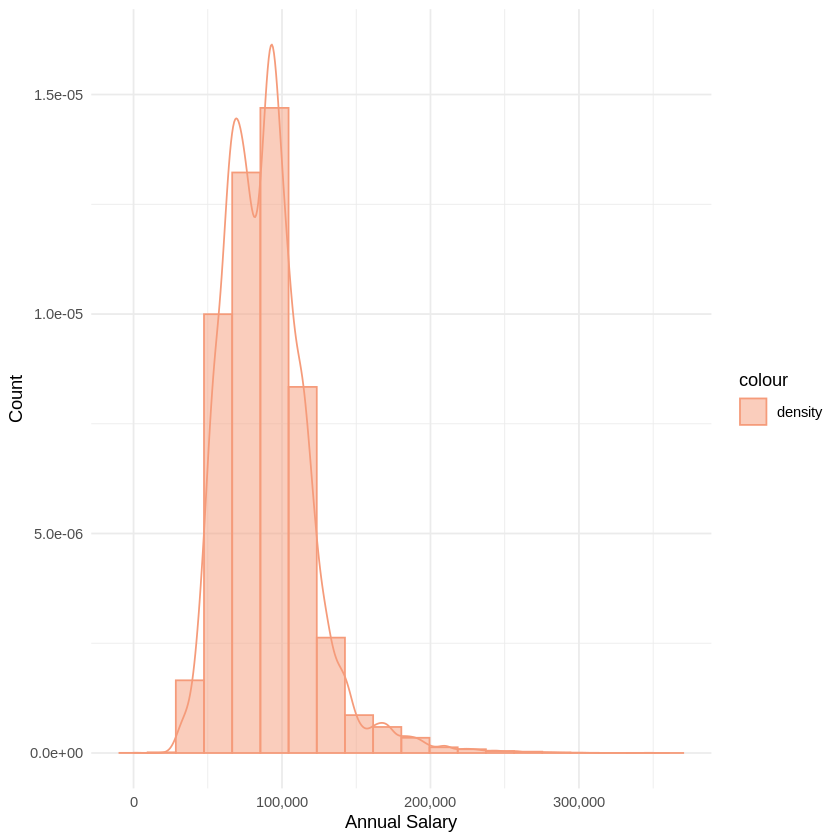

In [41]:
# Distplot of Annual Salary

ggplot(data,aes(x = Projected.Annual.Salary, color = 'density')) +  
  geom_histogram(aes(y = ..density..), bins = 20,  fill = '#f59b7a', alpha = 0.5) +  
  geom_density(bw = 4000, color = '#f59b7a') +   
  ylab("Count") + 
  xlab("Annual Salary")  + theme(legend.title=element_blank()) + theme_minimal()+
  scale_color_manual(values = c('density' = '#f59b7a')) +
  scale_x_continuous(labels = scales::comma)  

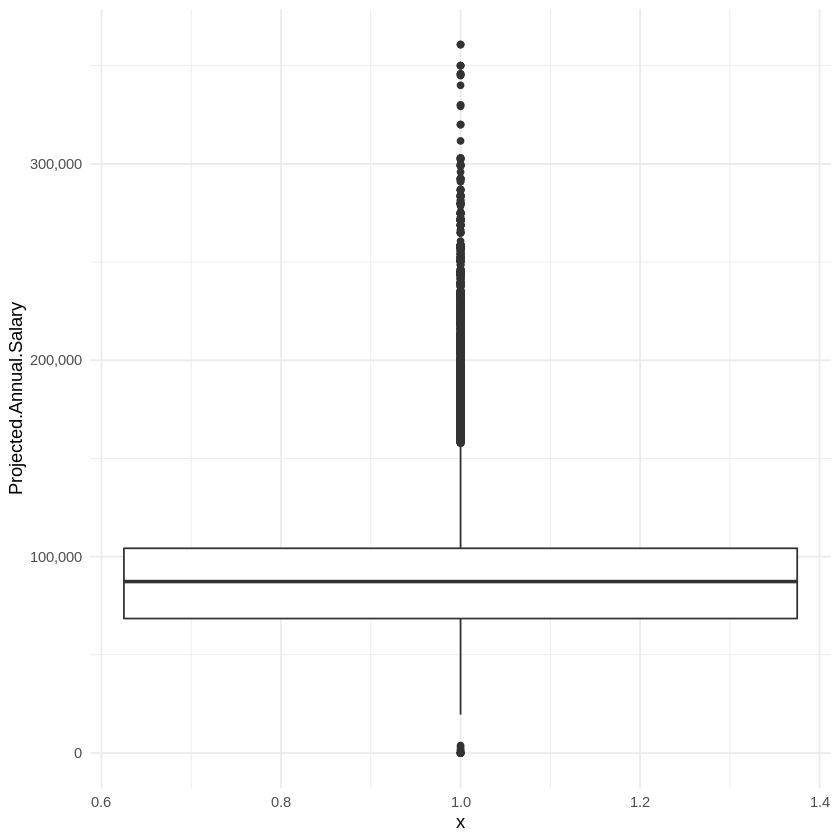

In [42]:
# Boxplot of annual salary.

ggplot(data, aes(x = 1, y = Projected.Annual.Salary)) + geom_boxplot() + 
    scale_y_continuous(labels = scales::comma)+ 
    theme_minimal()

 I can notice quite a few outliers in the salary attribute.

#### Correlations

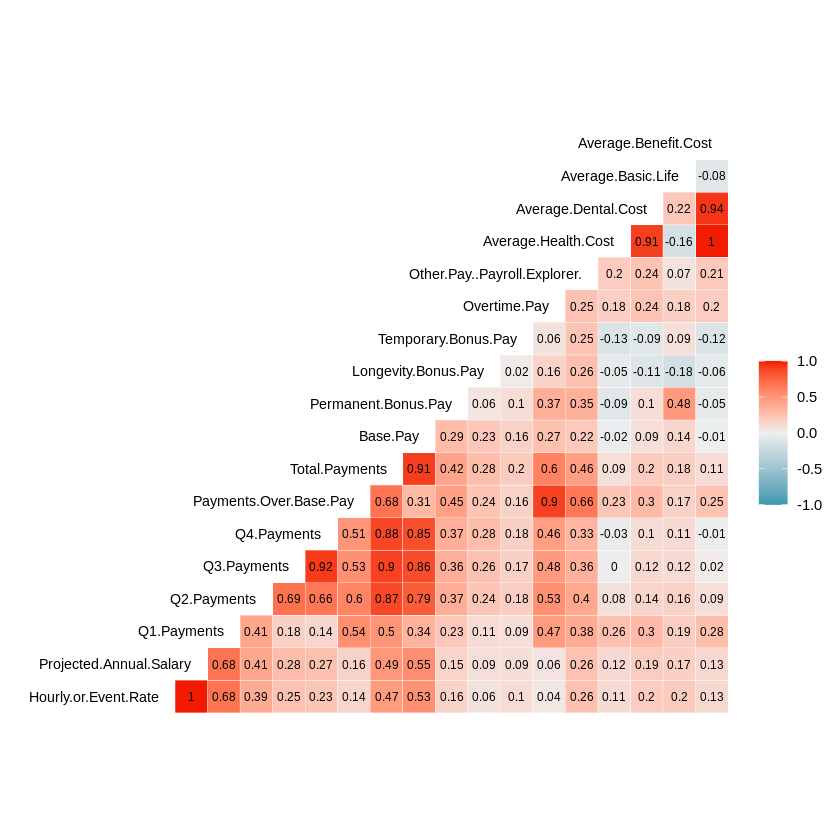

In [43]:
# Correlation Plot
corr_plot <- ggcorr(data[5:22], label = TRUE, label_size = 2.5, label_round = 2, label_alpha = FALSE, hjust = 1, size = 3, layout.exp = 4)
corr_plot + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Testing Models

#### Train & Test Splitting

In [44]:
sum(is.na(data))

[1] 20745

In [45]:
data <- na.omit(data)

In [46]:
# Splitting data into train and test 

set.seed(100) 
split = sample.split(data$Average.Basic.Life, SplitRatio = 0.7)

data_train = subset(data, split==TRUE)
data_test = subset(data, split==FALSE)

In [47]:
nrow(data_train)
nrow(data_test)

[1] 151065

[1] 64743

#### Linear Regression 

First I will be doing a simple regression model to predict 'Average Basic life' (life insurance cost sponsored by company) of employees.

I am selecting the independent variables from the correlation plot above, and also selecting ones that I feel might help. 

In [48]:
names(data)

[1] "Year"                         "Department.Title"            
 [3] "Job.Class.Title"              "Employment.Type"             
 [5] "Hourly.or.Event.Rate"         "Projected.Annual.Salary"     
 [7] "Q1.Payments"                  "Q2.Payments"                 
 [9] "Q3.Payments"                  "Q4.Payments"                 
[11] "Payments.Over.Base.Pay"       "Total.Payments"              
[13] "Base.Pay"                     "Permanent.Bonus.Pay"         
[15] "Longevity.Bonus.Pay"          "Temporary.Bonus.Pay"         
[17] "Overtime.Pay"                 "Other.Pay..Payroll.Explorer."
[19] "Average.Health.Cost"          "Average.Dental.Cost"         
[21] "Average.Basic.Life"           "Average.Benefit.Cost"        
[23] "Benefits.Plan"

In [49]:
model1 <- lm(Average.Basic.Life ~  Average.Dental.Cost+
                                    Other.Pay..Payroll.Explorer.+
                                    Payments.Over.Base.Pay+Total.Payments+
                                    Permanent.Bonus.Pay+
                                    Q1.Payments+Q2.Payments+
                                    Projected.Annual.Salary+
                                    Hourly.or.Event.Rate, data = data_train)


In [50]:
summary(model1)


Call:
lm(formula = Average.Basic.Life ~ Average.Dental.Cost + Other.Pay..Payroll.Explorer. + 
    Payments.Over.Base.Pay + Total.Payments + Permanent.Bonus.Pay + 
    Q1.Payments + Q2.Payments + Projected.Annual.Salary + Hourly.or.Event.Rate, 
    data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-654.38  -31.93  -11.27   54.09  715.72 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -3.188e+01  6.355e-01 -50.158  < 2e-16 ***
Average.Dental.Cost           8.395e-02  5.819e-04 144.272  < 2e-16 ***
Other.Pay..Payroll.Explorer. -1.477e-03  2.704e-05 -54.608  < 2e-16 ***
Payments.Over.Base.Pay       -5.217e-05  1.895e-05  -2.753   0.0059 ** 
Total.Payments                5.901e-06  9.393e-06   0.628   0.5298    
Permanent.Bonus.Pay           1.084e-02  5.804e-05 186.829  < 2e-16 ***
Q1.Payments                  -2.579e-04  2.605e-05  -9.901  < 2e-16 ***
Q2.Payments                   1.917e-04  2.384e

In [51]:
# Lets Predict on the test data and calculate the Mean Squared Error.
model1_pred_test = predict(model1, newdata = data_test)

mse_m1_test <- mean((data_test$Average.Basic.Life - model1_pred_test)^2)
mse_m1_test

[1] 4478.769

In [52]:
# Predicting on the train data and calculating the Mean Squared Error.
model1_pred_train <- predict(model1, newdata = data_train)
mse_m1_train <- mean((data_train$Average.Basic.Life - model1_pred_train)^2)
mse_m1_train

[1] 4480.794

In this first model, the R^2 value is fairly bad. The Mean squared error of both the test and training data are pretty high which suggests that the model is underfitted.

#### Linear Regression (Using Stepwise Selection)

In this second model, I will be using stepwise selection to find the model with the lowest AIC value.

In [53]:
model_data_train <- data_train[c('Hourly.or.Event.Rate','Projected.Annual.Salary','Q1.Payments','Payments.Over.Base.Pay','Total.Payments','Permanent.Bonus.Pay','Other.Pay..Payroll.Explorer.','Overtime.Pay','Average.Health.Cost','Average.Dental.Cost','Average.Basic.Life')]
model_data_test <- data_test[c('Hourly.or.Event.Rate','Projected.Annual.Salary','Q1.Payments','Payments.Over.Base.Pay','Total.Payments','Permanent.Bonus.Pay','Other.Pay..Payroll.Explorer.','Overtime.Pay','Average.Health.Cost','Average.Dental.Cost','Average.Basic.Life')]
names(model_data_test)

[1] "Hourly.or.Event.Rate"         "Projected.Annual.Salary"     
 [3] "Q1.Payments"                  "Payments.Over.Base.Pay"      
 [5] "Total.Payments"               "Permanent.Bonus.Pay"         
 [7] "Other.Pay..Payroll.Explorer." "Overtime.Pay"                
 [9] "Average.Health.Cost"          "Average.Dental.Cost"         
[11] "Average.Basic.Life"

In [54]:
# Using stepAIC to choose the model with lowest AIC.

response_variable <- "Average.Basic.Life"

full_model <- lm(as.formula(paste(response_variable, "~ .")), data = model_data_train)
final_model <- stepAIC(full_model, direction = "backward")

summary(final_model)

Start:  AIC=954676.4
Average.Basic.Life ~ Hourly.or.Event.Rate + Projected.Annual.Salary + 
    Q1.Payments + Payments.Over.Base.Pay + Total.Payments + Permanent.Bonus.Pay + 
    Other.Pay..Payroll.Explorer. + Overtime.Pay + Average.Health.Cost + 
    Average.Dental.Cost


Step:  AIC=954676.4
Average.Basic.Life ~ Hourly.or.Event.Rate + Projected.Annual.Salary + 
    Q1.Payments + Payments.Over.Base.Pay + Total.Payments + Permanent.Bonus.Pay + 
    Other.Pay..Payroll.Explorer. + Average.Health.Cost + Average.Dental.Cost

                               Df Sum of Sq       RSS     AIC
- Projected.Annual.Salary       1         6  83886291  954674
- Hourly.or.Event.Rate          1        54  83886339  954674
<none>                                       83886286  954676
- Payments.Over.Base.Pay        1   1975982  85862268  958192
- Q1.Payments                   1   2148736  86035022  958495
- Other.Pay..Payroll.Explorer.  1   2617364  86503649  959316
- Permanent.Bonus.Pay           1   3276


Call:
lm(formula = Average.Basic.Life ~ Hourly.or.Event.Rate + Q1.Payments + 
    Payments.Over.Base.Pay + Total.Payments + Permanent.Bonus.Pay + 
    Other.Pay..Payroll.Explorer. + Average.Health.Cost + Average.Dental.Cost, 
    data = model_data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-93.947 -15.584  -1.045  12.627 186.591 

Coefficients:
                               Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                   5.325e+02  5.900e-01   902.63  < 2e-16 ***
Hourly.or.Event.Rate          5.842e-02  8.103e-03     7.21 5.63e-13 ***
Q1.Payments                   5.722e-04  9.199e-06    62.20  < 2e-16 ***
Payments.Over.Base.Pay        3.986e-04  6.683e-06    59.65  < 2e-16 ***
Total.Payments               -2.317e-04  2.327e-06   -99.57  < 2e-16 ***
Permanent.Bonus.Pay           1.710e-03  2.226e-05    76.81  < 2e-16 ***
Other.Pay..Payroll.Explorer. -6.558e-04  9.553e-06   -68.65  < 2e-16 ***
Average.Health.Cost          -6.598e-02  6.384e-05 

In [55]:
# Predicting on test data

predictions <- predict(full_model, newdata = model_data_test)

if (any(is.na(predictions)) || any(is.na(model_data_test$Average.Basic.Life))) {
  print("Warning: Missing values detected in predictions or actual values.")
} else {
  mse <- mean((model_data_test$Average.Basic.Life - predictions)^2)
  print(paste("Mean Squared Error on Test Data:", mse))
}

Warning message in predict.lm(full_model, newdata = model_data_test):
“prediction from a rank-deficient fit may be misleading”


[1] "Mean Squared Error on Test Data: 555.742540978591"


In [56]:
# Predicting on train data

predictions_train <- predict(full_model, newdata = model_data_train)
mse <- mean((model_data_train$Average.Basic.Life - predictions_train)^2)
print(paste("Mean Squared Error on Train Data:", mse))

Warning message in predict.lm(full_model, newdata = model_data_train):
“prediction from a rank-deficient fit may be misleading”


[1] "Mean Squared Error on Train Data: 555.299280340334"


This error means that there are linear dependencies among the predictor variables, making it hard to estimate unique coefficients for all variables. This could be due to multicollinearity or having redundant variables in the model.

Let's use the alias funtions below to identify which coefficients are linearly dependent on others.

In [57]:
alias(full_model)

Model :
Average.Basic.Life ~ Hourly.or.Event.Rate + Projected.Annual.Salary + 
    Q1.Payments + Payments.Over.Base.Pay + Total.Payments + Permanent.Bonus.Pay + 
    Other.Pay..Payroll.Explorer. + Overtime.Pay + Average.Health.Cost + 
    Average.Dental.Cost

Complete :
             (Intercept) Hourly.or.Event.Rate Projected.Annual.Salary
Overtime.Pay  0           0                    0                     
             Q1.Payments Payments.Over.Base.Pay Total.Payments
Overtime.Pay  0           1                      0            
             Permanent.Bonus.Pay Other.Pay..Payroll.Explorer.
Overtime.Pay  0                  -1                          
             Average.Health.Cost Average.Dental.Cost
Overtime.Pay  0                   0                 


We can notice that ' Other.Pay..Payroll.Explorer.' & 'Payments.Over.Base.Pay' have some issues with 'Overtime.Pay' as it indicates multicollinearity.


Nevertheless, it seems like this model performed much better having a better R^2 value and a lower MSE value.

#### Linear Regression (Using PCA)

In the final model, I will using Principle Component Analysis to help me out. As we saw previously, there are linear combinations of predictor variables. PCA might be useful here.

In [58]:
data1 = data[5:21]
names(data1)

[1] "Hourly.or.Event.Rate"         "Projected.Annual.Salary"     
 [3] "Q1.Payments"                  "Q2.Payments"                 
 [5] "Q3.Payments"                  "Q4.Payments"                 
 [7] "Payments.Over.Base.Pay"       "Total.Payments"              
 [9] "Base.Pay"                     "Permanent.Bonus.Pay"         
[11] "Longevity.Bonus.Pay"          "Temporary.Bonus.Pay"         
[13] "Overtime.Pay"                 "Other.Pay..Payroll.Explorer."
[15] "Average.Health.Cost"          "Average.Dental.Cost"         
[17] "Average.Basic.Life"

In [59]:
#scaled_data = as.data.frame(scale(data1))
#sapply(scaled_data,mean)

In [60]:
# Scaling the data before working on them

scaled_data_test = as.data.frame(scale(data_test[5:21]))
scaled_data_train = as.data.frame(scale(data_train[5:21]))

Below we are checking if the variables have mean close to 0 and Standard Deviation close 1 to confirm that they are standardized.

In [61]:
sapply(scaled_data_train,mean)

Hourly.or.Event.Rate      Projected.Annual.Salary 
                2.295647e-16                 2.664795e-16 
                 Q1.Payments                  Q2.Payments 
               -7.636207e-17                -1.250140e-16 
                 Q3.Payments                  Q4.Payments 
                7.590101e-17                -2.207769e-16 
      Payments.Over.Base.Pay               Total.Payments 
                1.606575e-17                 1.904383e-16 
                    Base.Pay          Permanent.Bonus.Pay 
               -8.560821e-18                -6.652518e-17 
         Longevity.Bonus.Pay          Temporary.Bonus.Pay 
               -4.384458e-17                -3.772303e-17 
                Overtime.Pay Other.Pay..Payroll.Explorer. 
               -2.084239e-17                 6.948925e-18 
         Average.Health.Cost          Average.Dental.Cost 
               -1.948243e-15                -5.894937e-17 
          Average.Basic.Life 
                1.029350e-16

In [62]:
sapply(scaled_data_train,sd)

Hourly.or.Event.Rate      Projected.Annual.Salary 
                           1                            1 
                 Q1.Payments                  Q2.Payments 
                           1                            1 
                 Q3.Payments                  Q4.Payments 
                           1                            1 
      Payments.Over.Base.Pay               Total.Payments 
                           1                            1 
                    Base.Pay          Permanent.Bonus.Pay 
                           1                            1 
         Longevity.Bonus.Pay          Temporary.Bonus.Pay 
                           1                            1 
                Overtime.Pay Other.Pay..Payroll.Explorer. 
                           1                            1 
         Average.Health.Cost          Average.Dental.Cost 
                           1                            1 
          Average.Basic.Life 
                           1

In [63]:
# We are removing the predicted variable before doing PCA

data1pca = prcomp(scaled_data_train[,-17])

In [64]:
summary(data1pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.5332 1.5854 1.4165 1.10278 0.99265 0.97320 0.87461
Proportion of Variance 0.4011 0.1571 0.1254 0.07601 0.06158 0.05919 0.04781
Cumulative Proportion  0.4011 0.5582 0.6836 0.75959 0.82117 0.88037 0.92818
                           PC8     PC9    PC10    PC11    PC12    PC13
Standard deviation     0.67467 0.60254 0.42271 0.27915 0.27247 0.01123
Proportion of Variance 0.02845 0.02269 0.01117 0.00487 0.00464 0.00001
Cumulative Proportion  0.95662 0.97931 0.99048 0.99535 0.99999 1.00000
                            PC14      PC15      PC16
Standard deviation     3.171e-16 2.884e-16 1.883e-16
Proportion of Variance 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  1.000e+00 1.000e+00 1.000e+00

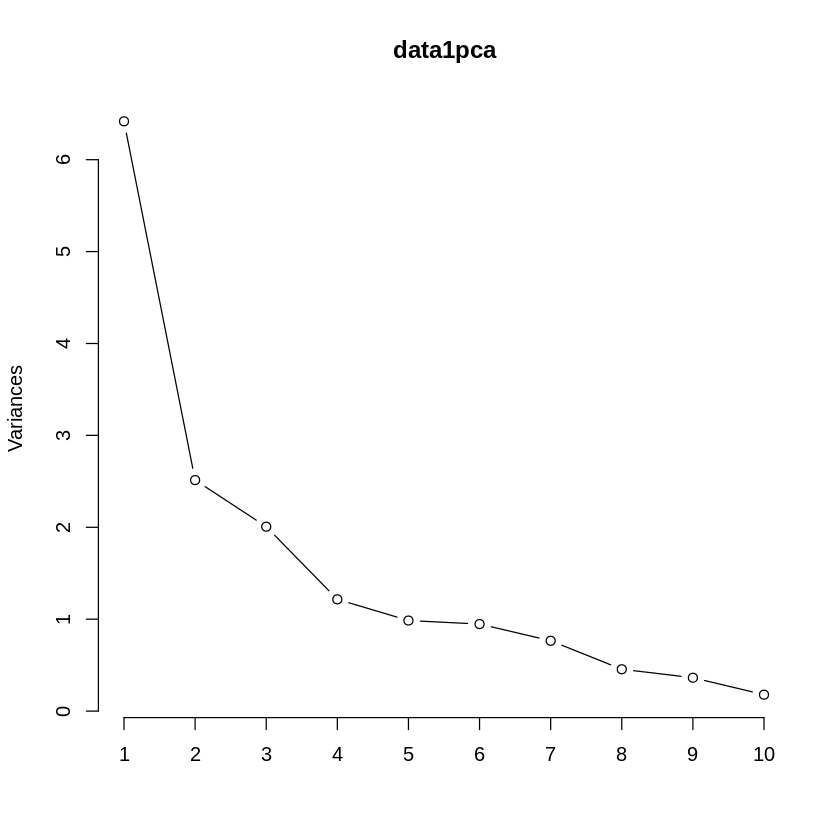

In [65]:
screeplot(data1pca, type="lines")

In [66]:
model2 <- lm(data_train$Average.Basic.Life ~ data1pca$x[,1]+ 
                                  data1pca$x[,2]+ 
                                  data1pca$x[,3]+ 
                                  data1pca$x[,4]+
                                  data1pca$x[,5]+
                                  data1pca$x[,6]+
                                  data1pca$x[,7])
summary(model2)


Call:
lm(formula = data_train$Average.Basic.Life ~ data1pca$x[, 1] + 
    data1pca$x[, 2] + data1pca$x[, 3] + data1pca$x[, 4] + data1pca$x[, 
    5] + data1pca$x[, 6] + data1pca$x[, 7])

Residuals:
    Min      1Q  Median      3Q     Max 
-621.00  -47.54  -25.66   58.45  331.81 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      64.82053    0.17645  367.37   <2e-16 ***
data1pca$x[, 1]   9.79120    0.06965  140.57   <2e-16 ***
data1pca$x[, 2]   7.02360    0.11129   63.11   <2e-16 ***
data1pca$x[, 3]  -3.47621    0.12457  -27.91   <2e-16 ***
data1pca$x[, 4]   6.02560    0.16000   37.66   <2e-16 ***
data1pca$x[, 5]  17.23775    0.17775   96.98   <2e-16 ***
data1pca$x[, 6] -21.25416    0.18131 -117.23   <2e-16 ***
data1pca$x[, 7] -29.25121    0.20174 -144.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68.58 on 151057 degrees of freedom
Multiple R-squared:  0.317,	Adjusted R-squared:  0.317

As seen above, the model captures 90% of the variance with 7 Principle Components.

In [67]:
# Predicting on test data

model2_pred_test = predict(model2, newdata = scaled_data_test)

mse_m2_test <- mean((scaled_data_test$Average.Basic.Life - model2_pred_test)^2)
mse_m2_test

Warning message:
“'newdata' had 64743 rows but variables found have 151065 rows”
Warning message in scaled_data_test$Average.Basic.Life - model2_pred_test:
“longer object length is not a multiple of shorter object length”


[1] 6382.496

In [68]:
# Predicting on train data

model2_pred_train = predict(model2, newdata = scaled_data_train)

mse_m2_train <- mean((scaled_data_train$Average.Basic.Life - model2_pred_train)^2)
mse_m2_train

[1] 6332.838

Observing the results, PCA did not do a great job at predicting either. The R^2 value is low and the mean squared error is fairly high compared to the model we found using stepwise selection.

### Visualizing Results

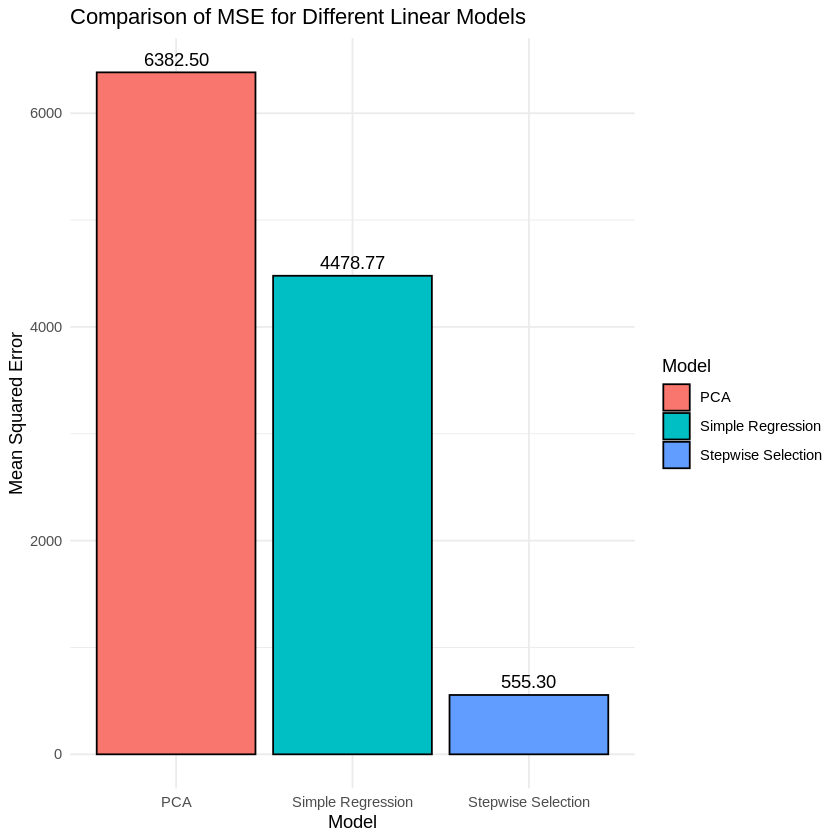

In [69]:
# Comparison of Mean Squared Errors for Different Linear Models

mse_data <- data.frame(Model = c("Simple Regression", "Stepwise Selection", "PCA"), MSE = c(mse_m1_test, mse, mse_m2_test))

ggplot(mse_data, aes(x = Model, y = MSE, fill = Model)) +
  geom_bar(stat = "identity", position = "dodge",color = "black") +
  geom_text(aes(label = sprintf("%.2f", MSE)), position = position_dodge(width = 0.7), vjust = -0.5)+
  labs(title = "Comparison of MSE for Different Linear Models", y = "Mean Squared Error") +
  theme_minimal() + scale_fill_manual(values = c("#F8766D", "#00BFC4", "#619CFF")) 

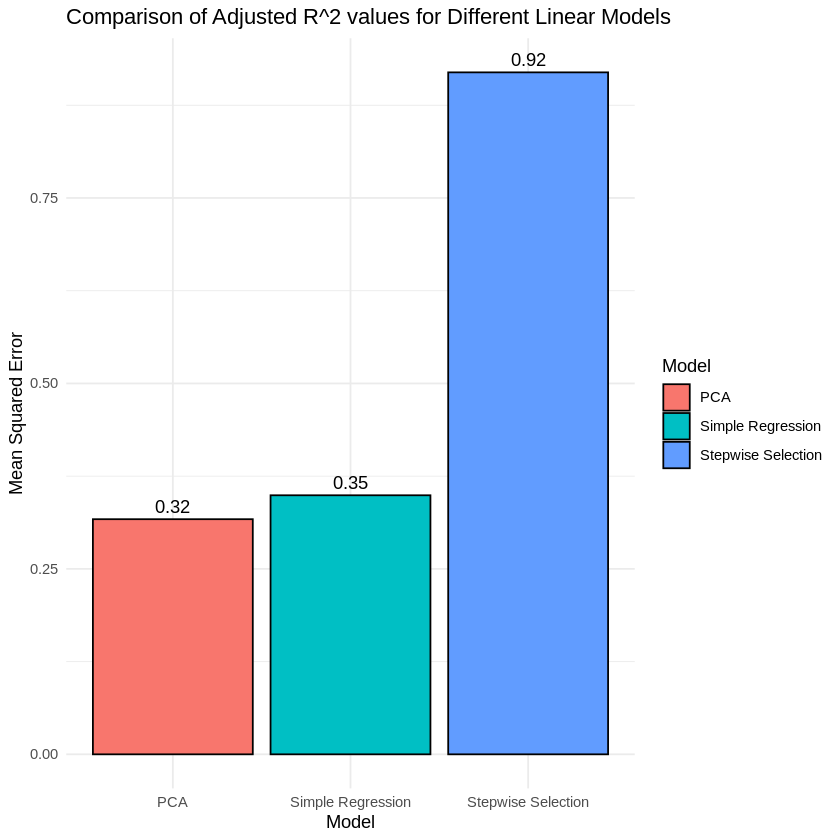

In [70]:
# Comparison of Adjusted R^2 values for Different Linear Models

mse_data <- data.frame(Model = c("Simple Regression", "Stepwise Selection", "PCA"), Adjusted_R2 = c(summary(model1)$adj.r.squared
,summary(final_model)$adj.r.squared,summary(model2)$adj.r.squared))

ggplot(mse_data, aes(x = Model, y = Adjusted_R2, fill = Model)) +
  geom_bar(stat = "identity", position = "dodge",color = "black") +
  geom_text(aes(label = sprintf("%.2f", Adjusted_R2)), position = position_dodge(width = 0.7), vjust = -0.5)+
  labs(title = "Comparison of Adjusted R^2 values for Different Linear Models", y = "Mean Squared Error") +
  theme_minimal() + scale_fill_manual(values = c("#F8766D", "#00BFC4", "#619CFF")) 

### Conclusion


In conclusion, this analysis involved exploring and modeling the factors influencing the "Average Basic Life" cost for employees. The first model, a multiple linear regression, revealed that attributes such as "Average Dental Cost," "Permanent Bonus Pay," and "Q1 Payments" significantly impact the target variable. However, the model's performance, indicated by the R-squared value of 0.35, suggests that there is room for improvement. 

Subsequently, a stepwise selection method was applied to identify a set of predictors. This streamlined model demonstrated a higher R-squared value of 0.92, emphasizing the effectiveness of feature selection. 

Lastly, the implementation of Principal Component Analysis (PCA) in the third model provided insights into the linear combinations of features. This model achieved a R-squared value of 0.32 similar to the first model applied. 

Finally, the comparison of Mean Squared Errors (MSE) indicates that the stepwise selection model performed the best among the three, showcasing its potential for accurate predictions and reduced complexity. The findings portray the importance of thoughtful feature selection in enhancing predictive power.

~ **fin** ~